In [1]:
# Load the Boston Housing dataset
import pandas as pd
import numpy as np
file_path = r"C:\Users\popov\BostonHousingAnalysis\data\BostonHousing.csv"
df_original = pd.read_csv(file_path)

# Display the first few rows to ensure the data is loaded correctly
df_original.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:

# Data Exploration and Preprocessing

# Check for missing values
missing_data = df_original.isnull().sum()
print("Missing values for each column:\n", missing_data)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_original.drop("medv", axis=1)), columns=df_original.columns[:-1])

df_scaled.head()


Missing values for each column:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [3]:
# PCA for Dimensionality Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

df_pca.head()


,Principal Component 1,Principal Component 2
0,-2.098297,0.773112
1,-1.457252,0.591985
2,-2.074598,0.599639
3,-2.611504,-0.006871
4,-2.458185,0.097712


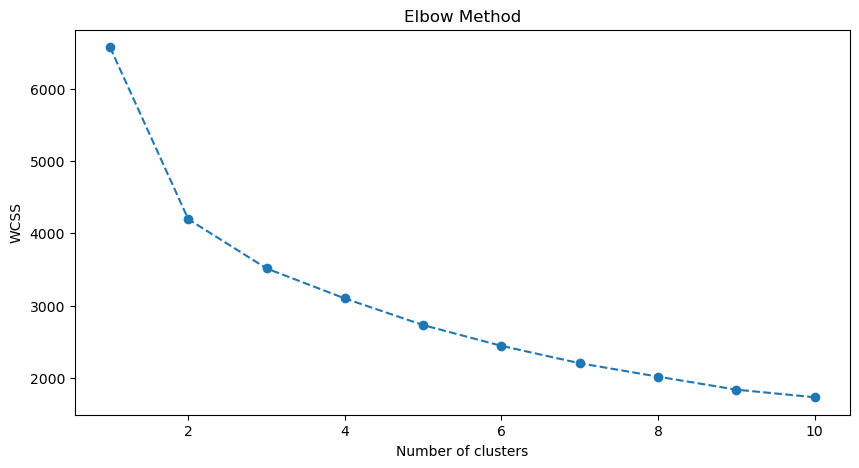

In [4]:
# Determine the optimal number of clusters

import warnings

# Suppress the UserWarning related to KMeans
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
# K-Means Clustering

# 'n' is the optimal number of clusters chosen based on the elbow method and visual inspection
n = 3  # Update this value if needed based on further analysis or observations

# Initialize the KMeans algorithm
# 'k-means++' initialization method selects initial cluster centers in a smart way to speed up convergence
kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)

# Fit the algorithm to the scaled data and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(df_scaled)


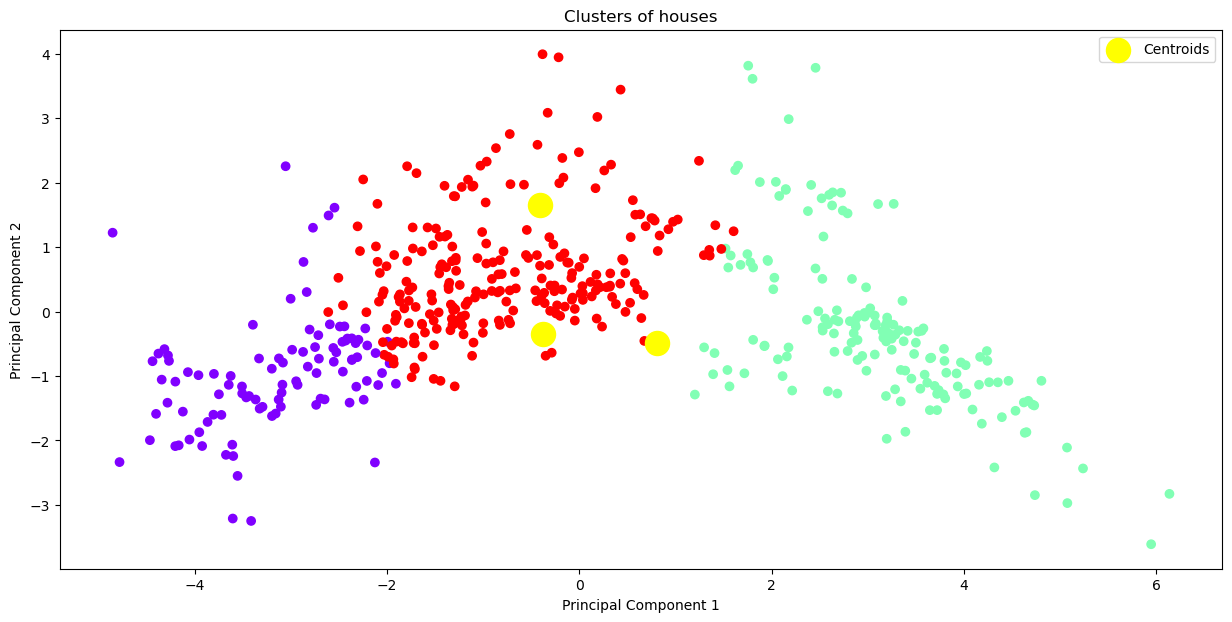

In [6]:
# Visualizing the Clusters

plt.figure(figsize=(15,7))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of houses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [7]:
# Analyzing the Clusters

df_clustered = df_original.copy()
df_clustered['Cluster'] = y_kmeans

# Display the mean values for each cluster
cluster_analysis = df_clustered.groupby(['Cluster']).mean()
cluster_analysis


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
Cluster,,,,,,,,,,,,,,
0,0.070558,49.880000,3.949200,0.050000,0.425297,6.674690,31.047000,6.794094,4.230000,299.780000,17.062000,389.570300,6.374800,28.483000
1,10.597188,0.000000,18.787669,0.073620,0.685479,5.955276,90.974847,1.997120,20.288344,627.723926,19.758282,297.590613,18.906319,16.234969
2,0.387019,3.135802,8.962551,0.074074,0.520218,6.345045,68.993004,3.766879,4.534979,305.641975,18.155144,382.768560,11.042140,24.308642


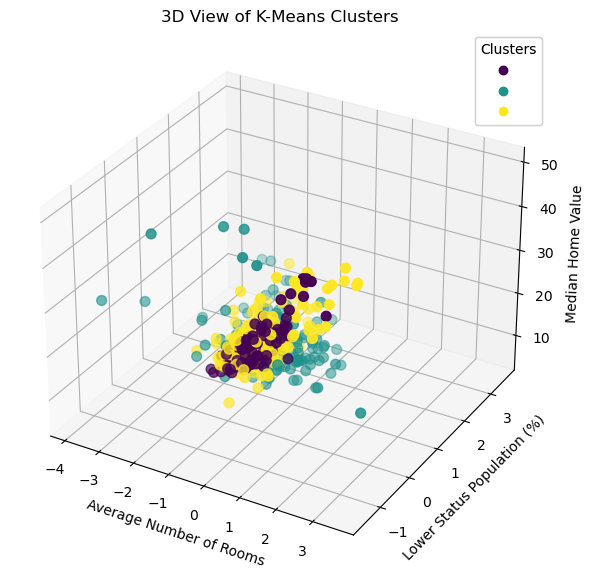

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_scaled['rm'], df_scaled['lstat'], df_original['medv'], c=y_kmeans, s=50)
legend1 = ax.legend(handles=scatter.legend_elements()[0], title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('Average Number of Rooms')
ax.set_ylabel('Lower Status Population (%)')
ax.set_zlabel('Median Home Value')
ax.set_title('3D View of K-Means Clusters')

plt.show()



In [10]:
# Load the Boston Housing dataset
import pandas as pd
import numpy as np
file_path = r"C:\Users\popov\BostonHousingAnalysis\data\BostonHousing.csv"
df_original = pd.read_csv(file_path)

# Display the first few rows to ensure the data is loaded correctly
df_original.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
# Check for missing values
missing_data = df_original.isnull().sum()
print("Missing values for each column:\n", missing_data)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_original.drop("medv", axis=1)), columns=df_original.columns[:-1])

print(df_scaled.head())


Missing values for each column:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
       crim        zn     indus      chas       nox        rm       age  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        dis       rad       tax   ptratio         b     lstat  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4

In [12]:
from sklearn.decomposition import PCA

# Reduce data dimensions using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

print(df_pca.head())


   Principal Component 1  Principal Component 2
0              -2.098297               0.773117
1              -1.457252               0.591984
2              -2.074598               0.599639
3              -2.611504              -0.006871
4              -2.458185               0.097712


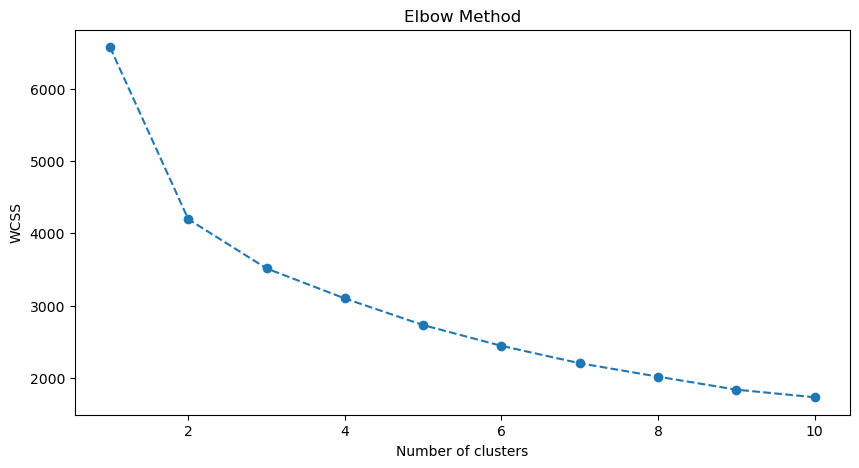

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [14]:
# Apply K-Means clustering with the determined number of clusters
n = 3  # Replace with the actual number determined from the elbow method
kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)


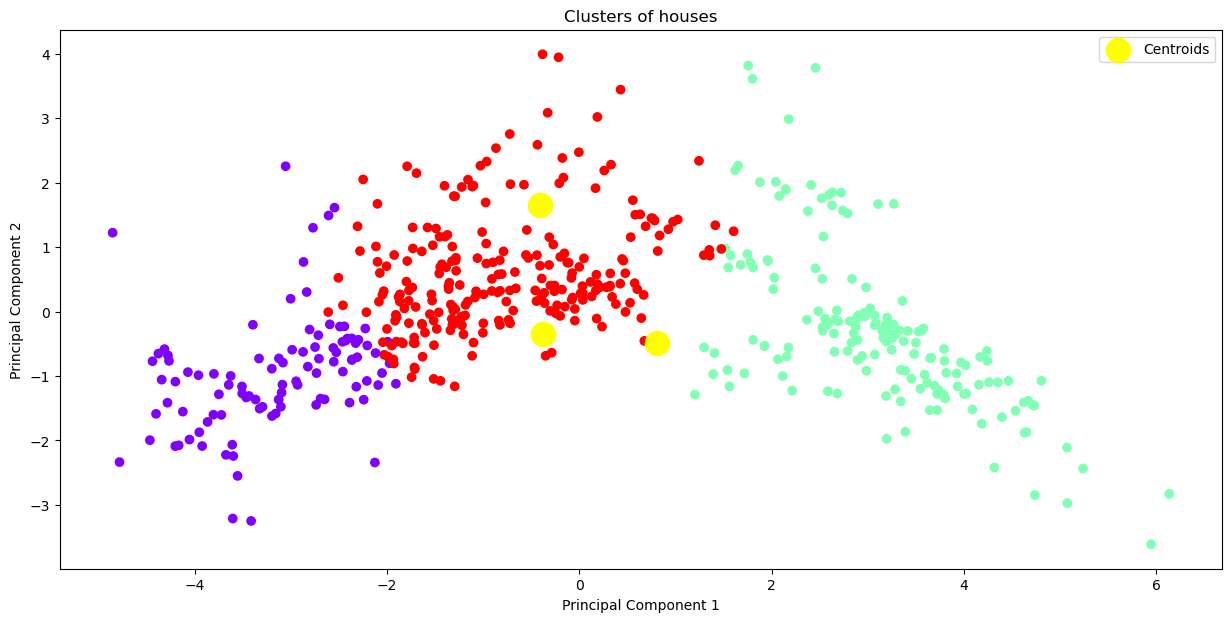

In [15]:
# Visualize the clusters
plt.figure(figsize=(15,7))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of houses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [16]:
# Add cluster labels to the original DataFrame
df_clustered = df_original.copy()
df_clustered['Cluster'] = y_kmeans

# Calculate the mean for each cluster
cluster_analysis = df_clustered.groupby(['Cluster']).mean()

#  Analyze 
cluster_analysis['Cluster Label'] = ['High Value Homes', 'Low Value Homes', 'Medium Value Homes']

print(cluster_analysis[['Cluster Label', 'rm', 'lstat', 'medv']])


              Cluster Label        rm      lstat       medv
Cluster                                                    
0          High Value Homes  6.674690   6.374800  28.483000
1           Low Value Homes  5.955276  18.906319  16.234969
2        Medium Value Homes  6.345045  11.042140  24.308642


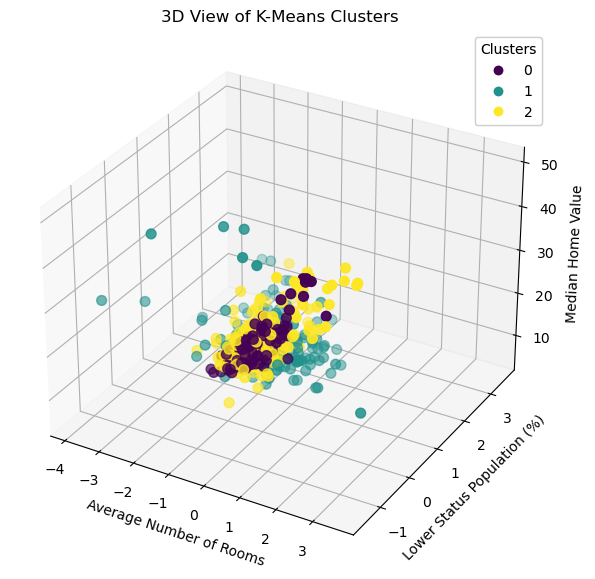

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot of the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_scaled['rm'], df_scaled['lstat'], df_original['medv'], c=y_kmeans, s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('Average Number of Rooms')
ax.set_ylabel('Lower Status Population (%)')
ax.set_zlabel('Median Home Value')
ax.set_title('3D View of K-Means Clusters')

plt.show()


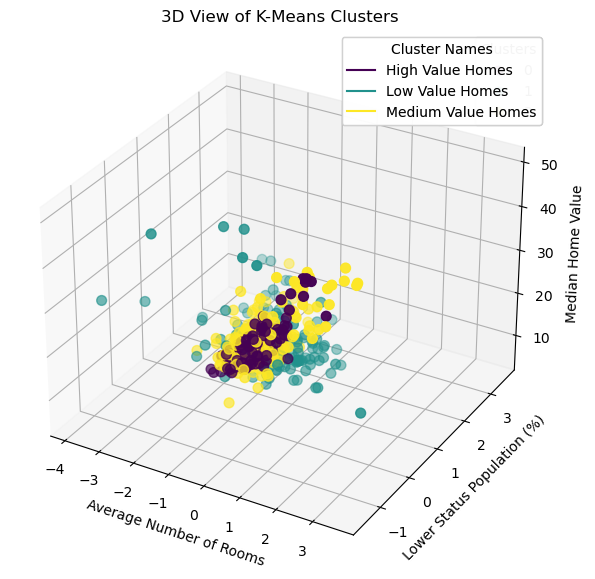

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot of the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_scaled['rm'], df_scaled['lstat'], df_original['medv'], c=y_kmeans, s=50)

# Define cluster names based on the cluster number
cluster_names = {0: 'High Value Homes', 1: 'Low Value Homes', 2: 'Medium Value Homes'}

# Create a legend with the cluster names
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
legend2 = ax.legend([plt.Line2D((0,1),(0,0), color=scatter.cmap(scatter.norm(0))),
                     plt.Line2D((0,1),(0,0), color=scatter.cmap(scatter.norm(1))),
                     plt.Line2D((0,1),(0,0), color=scatter.cmap(scatter.norm(2)))],
                    [cluster_names[0], cluster_names[1], cluster_names[2]],
                    title="Cluster Names")
ax.add_artist(legend1)  # Add the first legend manually
ax.add_artist(legend2)  # Add the second legend manually

ax.set_xlabel('Average Number of Rooms')
ax.set_ylabel('Lower Status Population (%)')
ax.set_zlabel('Median Home Value')
ax.set_title('3D View of K-Means Clusters')

plt.show()


AttributeError: 'Path3DCollection' object has no attribute 'alpha'

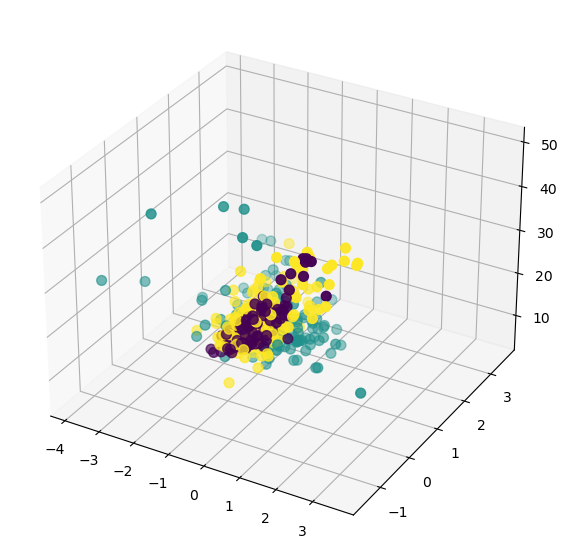

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot of the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_scaled['rm'], df_scaled['lstat'], df_original['medv'], c=y_kmeans, s=50)

# Define cluster names based on the cluster number
cluster_names = {0: 'High Value Homes', 1: 'Low Value Homes', 2: 'Medium Value Homes'}

# Create a legend with the cluster names
# Using scatter points instead of lines for the legend's symbols
legend_elements = [plt.Line2D([0], [0], linestyle="none", marker="o", alpha=scatter.alpha,
                              color=scatter.cmap(scatter.norm(0)), label=cluster_names[0]),
                   plt.Line2D([0], [0], linestyle="none", marker="o", alpha=scatter.alpha,
                              color=scatter.cmap(scatter.norm(1)), label=cluster_names[1]),
                   plt.Line2D([0], [0], linestyle="none", marker="o", alpha=scatter.alpha,
                              color=scatter.cmap(scatter.norm(2)), label=cluster_names[2])]

ax.legend(handles=legend_elements, title="Cluster Names")

ax.set_xlabel('Average Number of Rooms')
ax.set_ylabel('Lower Status Population (%)')
ax.set_zlabel('Median Home Value')
ax.set_title('3D View of K-Means Clusters')

plt.show()


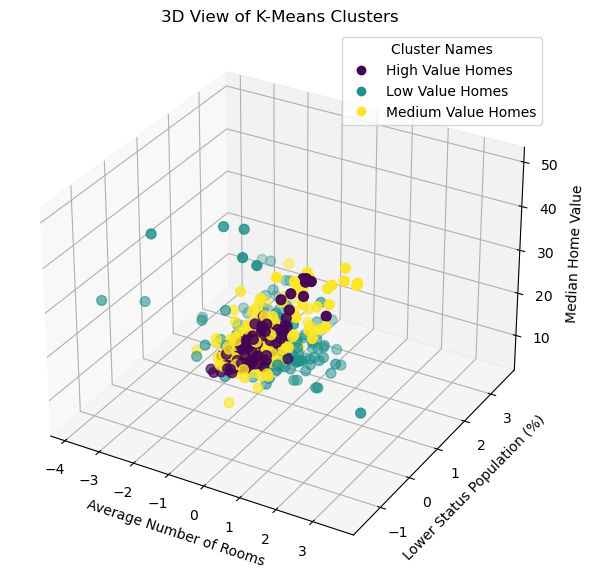

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot of the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_scaled['rm'], df_scaled['lstat'], df_original['medv'], c=y_kmeans, s=50)

# Define cluster names based on the cluster number
cluster_names = {0: 'High Value Homes', 1: 'Low Value Homes', 2: 'Medium Value Homes'}

# Create a legend with the cluster names
# Using scatter points instead of lines for the legend's symbols
legend_elements = [plt.Line2D([0], [0], linestyle="none", marker="o",
                              color=scatter.cmap(scatter.norm(0)), label=cluster_names[0]),
                   plt.Line2D([0], [0], linestyle="none", marker="o",
                              color=scatter.cmap(scatter.norm(1)), label=cluster_names[1]),
                   plt.Line2D([0], [0], linestyle="none", marker="o",
                              color=scatter.cmap(scatter.norm(2)), label=cluster_names[2])]

ax.legend(handles=legend_elements, title="Cluster Names")

ax.set_xlabel('Average Number of Rooms')
ax.set_ylabel('Lower Status Population (%)')
ax.set_zlabel('Median Home Value')
ax.set_title('3D View of K-Means Clusters')

plt.show()
